In [6]:
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/376.0 MB 7.0 MB/s eta 0:00:54
   ---------------------------------------- 3.1/376.0 MB 7.1 MB/s eta 0:00:53
   ---------------------------------------- 4.5/376.0 MB 7.1 MB/s eta 0:00:53
    --------------------------------------- 5.8/376.0 MB 6.9 MB/s eta 0:00:54
    --------------------------------------- 7.3/376.0 MB 6.9 MB/s eta 0:00:54
    --------------------------------------- 8.9/376.0 MB 7.0 MB/s eta 0:00:53
   - -------------------------------------- 10.5/376.0 MB 7.0 MB/s eta 0:00:53
   - -------------------------------------- 11.5/376.0 MB 6.9 MB/s eta 0:00:54
   - -------------------------------------- 12.6/376.0 MB 6.6 MB/s eta 0:00:56
   - -------------------------------------- 13.9/376.0 MB 6.6 MB/s eta 0:00:55
   - -------------------------------------- 15.5/376.0 MB 6.6 MB/s eta 0:00:55
   - -------------------------------------- 17.0/376.0 MB 6.8 MB/s

C:\Users\Hari\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


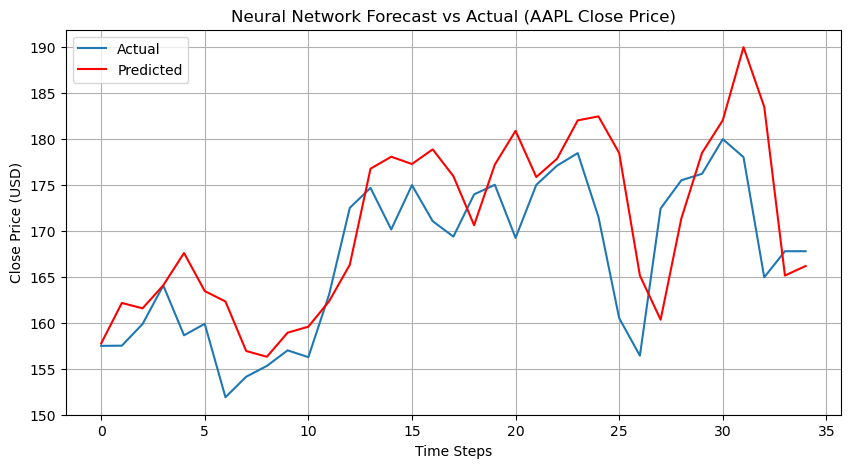

RMSE: 7.2108


In [8]:
# Install required packages (if not already available)
# !pip install pandas numpy matplotlib scikit-learn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('C:\\Users\\Hari\\Desktop\\Exp08\\AAPL.csv', parse_dates=['Date'], index_col='Date')

# Use the 'Close' price column
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Function to prepare time series data for supervised learning
def create_dataset(dataset, window_size):
    X, y = [], []
    for i in range(len(dataset) - window_size):
        X.append(dataset[i:i+window_size, 0])
        y.append(dataset[i+window_size, 0])
    return np.array(X), np.array(y)

# Define time window
window_size = 12
X, y = create_dataset(scaled_data, window_size)

# Split into training and testing sets (80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Predict on test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Neural Network Forecast vs Actual (AAPL Close Price)')
plt.xlabel('Time Steps')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Show RMSE
rmse = np.sqrt(mean_squared_error(actual, predictions))
print(f'RMSE: {rmse:.4f}')
